在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [553]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [554]:
#####################################
#                 1                 #
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。
with open('daily-engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

with open('project-submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)


In [555]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [556]:
project_submissions[0]

OrderedDict([('creation_date', '2015-1-14'),
             ('completion_date', '2015-1-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [557]:
def read_csv(file_name):
    with open(file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [558]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [559]:
project_submissions[0]

OrderedDict([('creation_date', '2015-1-14'),
             ('completion_date', '2015-1-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## 修正数据类型

In [560]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [561]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [562]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [563]:
#####################################
#                 3                 #
#####################################

## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"
for engagement_rec in daily_engagement:
    engagement_rec['account_key'] = engagement_rec['acct']
    del[engagement_rec['acct']]

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [564]:
def get_unique_student(data):
    unique_student = set()
    for item in data:
        unique_student.add(item['account_key'])
    return unique_student

In [565]:
#####################################
#                 2                 #
#####################################

## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量

enrollment_num_rows = len(enrollments)
print (enrollment_num_rows)
unique_enrollment_student = get_unique_student(enrollments)
unique_enrollment_student = len(unique_enrollment_student)
print (unique_enrollment_student)

engagement_num_rows = len(daily_engagement)
print (engagement_num_rows)
unique_engagement_student = get_unique_student(daily_engagement)
unique_student_engagement = len(unique_engagement_student)
print (unique_student_engagement)

submission_num_rows = len(project_submissions)
print (submission_num_rows)
unique_submission_student = get_unique_student(project_submissions)
unique_submissions = len(unique_submission_student)
print (unique_submissions)


1640
1302
136240
1237
3642
743


## 数据中的问题

## 缺失的互动（Engagement）记录

In [566]:
#####################################
#                 4                 #
#####################################

## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。
for enrollment_student in enrollments:
    if enrollment_student['account_key'] not in unique_engagement_student:
        print (enrollment_student)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## 检查更多的问题记录

In [567]:
#####################################
#                 5                 #
#####################################

## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）
num_of_no_engagement_students = 0
for enrollment in enrollments:
    student_account_key = enrollment['account_key']
    if (student_account_key not in unique_engagement_student 
        and enrollment['join_date'] != enrollment['cancel_date']):
        print (enrollment)
        num_of_no_engagement_students = num_of_no_engagement_students + 1




OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


In [568]:
num_of_no_engagement_students

3

# 查找Udacity测试学生账号

In [569]:
udacity_test_account = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_account.add(enrollment['account_key'])

len(udacity_test_account)

## 追踪剩余的问题

In [570]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [571]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [572]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)
print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


In [573]:
len(non_udacity_enrollments)

1622

In [574]:
len(non_udacity_engagement)

135656

In [575]:
len(non_udacity_submissions)

3634

## 重新定义问题

In [576]:
len(non_udacity_enrollments)

1622

In [577]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。

paid_students ={}
for enrollment in non_udacity_enrollments:
    account_key = enrollment['account_key']
    join_date = enrollment['join_date']
    
    days_to_cancel = enrollment['days_to_cancel']
    is_canceled = enrollment['is_canceled']
    if (not is_canceled or days_to_cancel >7):
        # update the value with latest join_date in the dictionary of paid_students
        if account_key not in paid_students or join_date > paid_students[account_key]:
            # or 两端的两个表达式的顺序很重要：显然如果不满足第一个条件，第二个表达式就会报错
            paid_students[account_key] = join_date

In [578]:
len(paid_students)

995

## 获取第1周的数据
获取第1周的数据

In [579]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [580]:
 # 建立一个函数，在过滤掉与未付费的学生相关的数据
 # 返回一个数组类型的数据结构
def filter_out_unpaid_students_data(data):
    data_of_paid_students = []
    for item in data:
        account_key = item['account_key']
        if account_key in paid_students:
            data_of_paid_students.append(item)
    return data_of_paid_students

In [581]:
paid_enrollments = filter_out_unpaid_students_data(non_udacity_enrollments)
paid_engagement = filter_out_unpaid_students_data(non_udacity_engagement)
paid_submissions = filter_out_unpaid_students_data(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

1293
134549
3618


In [582]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

paid_engagement_in_first_week = []

for engagement in paid_engagement:    
    account_key = engagement['account_key']
    # fetch join_date from paid_students dict
    join_date = paid_students[account_key]
    # fetch engagement_date from paid_engagement row record
    engagement_date = engagement['utc_date']
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)

In [583]:
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

## 统计教室访问次数并且增加相关数据列

In [584]:
def create_classroom_visit_count_column():
    for engagement in paid_engagement_in_first_week:
        num_courses_visited = engagement['num_courses_visited']
        if num_courses_visited>0:
            engagement['classroom_visit_count']=1
        else:
            engagement['classroom_visit_count']=0

In [585]:
## 调用函数增加新的数据列
create_classroom_visit_count_column()

In [586]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表
# 基于学生账号归类互动数据， 这是一次非常有益的尝试
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [587]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [588]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = list(total_minutes_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## 纠错现有的数据分析代码

In [589]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。
## 有一个学生在一周内的学习时间达到10568.1008673分钟
## 这是什么概念呢？10568/60/24 = 7.33天
## 也就会说七天七夜不眠不休，这条数据是不是有问题？
## 来吧，让我们找到这一条数据

student_max_minutes_num=0
max_minutes_accout_key = None
for account_key, total_minutes_num in total_minutes_by_account.items():
    if total_minutes_num>student_max_minutes_num:
        student_max_minutes_num=total_minutes_num
        max_minutes_accout_key = account_key
        
print (max_minutes_accout_key)
print (student_max_minutes_num)

163
3564.7332644989997


# 打印并且人工检查数据内容 

In [590]:
print ('Actual join date of this student:',paid_students[max_minutes_accout_key])

print ('------------------------------------------------------')
print ('I want to see all the angagement data of this student:')
print ('------------------------------------------------------')

for account_key, engagement_for_student in engagement_by_account.items():
    if account_key==max_minutes_accout_key:
        print (engagement_for_student)
        print ('\n')

## 通过对比可以发现，
## 目标学生的join_date是2015-04-20 00:00:00
## 该学生的engagement记录中有许多早于这个日期的记录
## 这说明函数within_one_week出现问题了
## 此外，为什么会有这样的数据出现在数据集中间，这个问题也非常值得思考


Actual join date of this student: 2015-07-09 00:00:00
------------------------------------------------------
I want to see all the angagement data of this student:
------------------------------------------------------
[OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('classroom_visit_count', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('classroom_visit_count', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('classroom_visit_count', 1)]), OrderedDict([('utc_date', datetime.datetime(2015,

In [591]:
## 抽象一个公用函数用来在控制台打印统计数据信息
def show_statistics_data(student_number_list):
    print ('Mean:', np.mean(student_number_list))
    print ('Standard deviation:', np.std(student_number_list))
    print ('Minimum:', np.min(student_number_list))
    print ('Maximum:', np.max(student_number_list))

In [592]:
def calculate_total_by_account(field_name):
    total_number_by_account = {}
    for account_key, engagements_for_student in engagement_by_account.items():
        total_number = 0
        for engagement_record in engagements_for_student:
            total_number += engagement_record[field_name]
        total_number_by_account[account_key] = total_number
    return total_number_by_account

## 第1周完成的课程数（Lessons）

In [593]:
#####################################
#                 9                 #
#####################################

## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码
total_by_account = calculate_total_by_account('classroom_visit_count')
total_by_account_value_list = list(total_by_account.values())
show_statistics_data(total_by_account_value_list);

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## 第1周的访问次数

In [594]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。
## 访问课程的次数大于1，即相当于访问教师的次数微1
total_by_account = calculate_total_by_account('classroom_visit_count')
total_by_account_value_list = list(total_by_account.values())
show_statistics_data(total_by_account_value_list);

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## 区分项目通过的学生

In [595]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

subway_project_lesson_keys = ['746169184', '3176718735']

# 我要从项目提交数据中找到那些学院账号通过了项目
passing_account_keys = set()
for submission in paid_submissions:
    account_key = submission['account_key']
    lesson_key = submission['lesson_key']
    assigned_rating = submission['assigned_rating']
    if ((lesson_key in subway_project_lesson_keys) and (assigned_rating=='PASSED' or assigned_rating=='DISTINCTION')):
        passing_account_keys.add(account_key)


# 打印项目通过的学生数量
#print (len(passing_account_keys))

passing_engagement =[]
non_passing_engagement =[]

for engagement in paid_engagement_in_first_week:
    account_key = engagement['account_key']
    if account_key in passing_account_keys:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print(len(passing_engagement))
print (len(non_passing_engagement))

4527
2392


## 对比两组学生数据

In [596]:
######################################
#                 12                 #
######################################

def group_data(data_list, field_name):
    result_dict = defaultdict(list)
    for item in data_list:
        field_value = item[field_name]
        result_dict[field_value].append(item)
    return result_dict
    
def sum_group_items(data_dict, field_name):
    total_number_by_key = {}
    for account_key, items_for_key in data_dict.items():
        total_number = 0
        for item in items_for_key:
            total_number += item[field_name]
        total_number_by_key[account_key] = total_number
    return total_number_by_key

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。
passing_dict = group_data(passing_engagement, 'account_key')
non_passing_dict = group_data(non_passing_engagement, 'account_key')

print("")
print("Comparing total_minutes_visited:")
passing1 = sum_group_items(passing_dict, 'total_minutes_visited')
non_passing1 = sum_group_items(non_passing_dict, 'total_minutes_visited')

# print ("Students who passed:")
# show_statistics_data(list(passing1.values()))
# print ("")
# print ("Students who didn't pass:")
# show_statistics_data(list(non_passing1.values()))

print("")
print("---------------------------------")
print("Comparing lessons_completed:")
passing2 = sum_group_items(passing_dict, 'lessons_completed')
non_passing2 = sum_group_items(non_passing_dict, 'lessons_completed')

# print ("Students who passed:")
# show_statistics_data(list(passing2.values()))
# print ("")
# print ("Students who didn't pass:")
# show_statistics_data(list(non_passing2.values()))


print ("How to calculate and compare days_visited?")


Comparing total_minutes_visited:

---------------------------------
Comparing lessons_completed:
How to calculate and compare days_visited?


## 制作直方图

Populating the interactive namespace from numpy and matplotlib
Comparing total_minutes_visited:
Students who passed:

Students who didn't pass:


D:\Users\sunrise2075\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


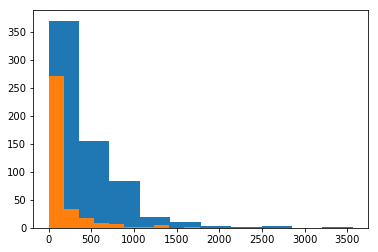

In [597]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。

%pylab inline
import matplotlib.pyplot as plt

def show_statistics_data_and_graph(total_number_list):
    plt.hist(total_number_list)
    
print("Comparing total_minutes_visited:")
print ("Students who passed:")
show_statistics_data_and_graph(list(passing1.values()))
print ("")
print ("Students who didn't pass:")
show_statistics_data_and_graph(list(non_passing1.values()))

# print("")
# print("Comparing lessons_completed:")
# print ("Students who passed:")
# show_statistics_data_and_graph(list(passing2.values()))
# print ("")
# print ("Students who didn't pass:")
# show_statistics_data_and_graph(list(non_passing2.values()))

## 改进图表及分享发现

In [598]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。